In [23]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from datetime import datetime

In [73]:
emissions_df = pd.read_excel(r"C:\Users\PRohr\Desktop\Masterarbeit\edb-emissions-databank_v29 (web).xlsx", sheet_name='Gaseous Emissions and Smoke')
emissions_df

,UID No,GSDB No,Manufacturer,Engine Identification,Combustor Description,Eng Type,B/P Ratio,Pressure Ratio,Rated Thrust (kN),Data Status,...,Final Test Date,Compliance with fuel venting requirements,Remark 1,Remark 2,Remark 3,Remark 4,Remark 5,Remark 6,Remark 7,Remark 8
0,1AS001,1,Allied Signal,TFE731-2-2B,NaN,TF,2.64,13.90,15.600,PR,...,1976-04-01,NaN,Not required to meet GASEOUS regulations,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1AS002,1,Allied Signal,TFE731-3,NaN,TF,2.64,14.30,16.500,PR,...,1976-08-01,NaN,Not required to meet GASEOUS regulations,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4AL003,4,Rolls-Royce Corporation,AE3007A,NaN,MTF,5.23,18.08,33.730,C,...,1995-04-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6AL004,6,Rolls-Royce Corporation,AE3007C1,NaN,MTF,5.10,16.60,31.500,C,...,1995-04-19,NaN,Results based on Rolls Royce report EDR 15171B,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6AL005,6,Rolls-Royce Corporation,AE3007A1,Type 1,MTF,4.77,17.97,34.910,R,...,1995-04-19,NaN,For effectivity see Rolls-Royce Notice to Oper...,Results are based on Rolls-Royce report EDR 15...,AE3007A1 data in this report replace data repo...,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826,1TL004,1,Textron Lycoming,"LF507-1F, -1H",NaN,TF,5.10,13.00,31.000,C,...,1990-12-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
827,1ZM001,1,IVCHENKO PROGRESS ZMBK,D-36,NaN,TF,5.00,19.90,63.765,C,...,1984-12-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
828,13ZM002,13,IVCHENKO PROGRESS ZMBK,D-36 ser. 4A,NaN,TF,5.00,19.90,63.770,C,...,1984-12-10,Yes,Applicable NOx regulation paragraph 2.3.2 a) (...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
829,13ZM003,13,IVCHENKO PROGRESS ZMBK,D-436-148 F1,NaN,TF,4.90,19.80,64.430,C,...,2006-07-28,Yes,"NOx levels in accordance with Part III, Chapte...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
emissions_df['Final Test Date']= pd.to_datetime(emissions_df['Final Test Date'])
emissions_df['Final Test Date']= emissions_df['Final Test Date'].dt.strftime('%Y')
#emissions_df = emissions_df.loc[emissions_df['Manufacturer'] == 'Pratt & Whitney']

yearly_emissions = emissions_df[['Final Test Date', 'HC EI Idle (g/kg)', 'B/P Ratio', 'Pressure Ratio']]
yearly_emissions = yearly_emissions.dropna()
yearly_emissions


,Final Test Date,HC EI Idle (g/kg),B/P Ratio,Pressure Ratio
0,1976,20.040,2.64,13.90
1,1976,9.040,2.64,14.30
2,1995,2.510,5.23,18.08
3,1995,4.840,5.10,16.60
4,1995,3.818,4.77,17.97
...,...,...,...,...
826,1990,4.720,5.10,13.00
827,1984,5.400,5.00,19.90
828,1984,5.400,5.00,19.90
829,2006,2.260,4.90,19.80


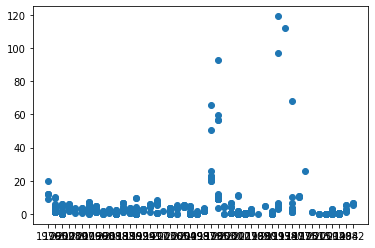

In [75]:
#filter the huge values out... 
#yearly_emissions = yearly_emissions.loc[yearly_emissions['HC EI Idle (g/kg)'] <= 15]
x = yearly_emissions['Final Test Date']
y = yearly_emissions['HC EI Idle (g/kg)']

plt.plot(x,y,'o')



<function matplotlib.pyplot.show(close=None, block=None)>

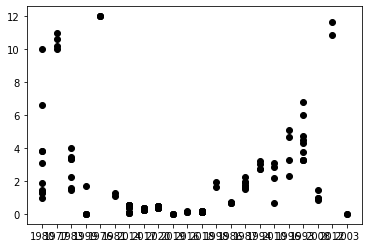

In [66]:
plt.scatter(yearly_emissions['Final Test Date'], yearly_emissions['HC EI Idle (g/kg)'], c ="black")
plt.show

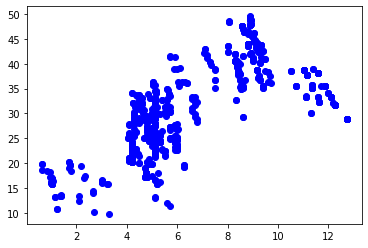

In [18]:
plt.scatter(emissions_df['B/P Ratio'], emissions_df['Pressure Ratio'], c ="blue")

In [35]:
x = x.dropna()

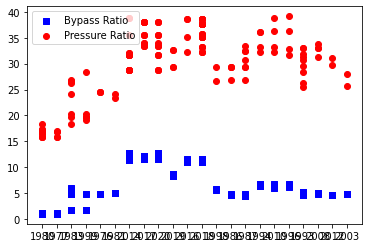

In [67]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

x = yearly_emissions['Final Test Date']
y = yearly_emissions['B/P Ratio']
z = yearly_emissions['Pressure Ratio']

ax1.scatter(x, y, c='b', marker="s", label='Bypass Ratio')
ax1.scatter(x, z, c='r', marker="o", label='Pressure Ratio')
plt.legend(loc='upper left')
plt.show()

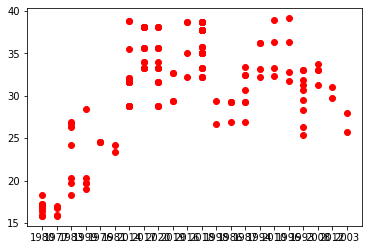

In [68]:
plt.scatter(yearly_emissions['Final Test Date'], yearly_emissions['Pressure Ratio'], c ="red")

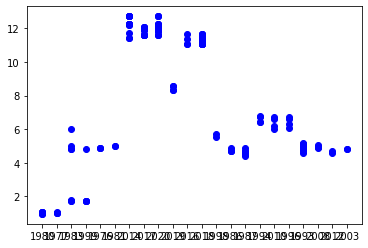

In [69]:
plt.scatter(yearly_emissions['Final Test Date'], yearly_emissions['B/P Ratio'], c ="blue")